In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings("ignore")

# Cross-validation provides information about how well a classifier generalizes, specifically the range of expected errors of the classifier.

In [3]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")


In [4]:
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [7]:
y.replace(["M","B"],[1,0], inplace = True)

# # Model Selection using all features( APPLAYING CROSS VALIDATION):

In [8]:
df1=X

In [9]:
X.head
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

In [10]:
models = [KNeighborsClassifier(n_neighbors=15),GaussianNB(),DecisionTreeClassifier(),BaggingClassifier(),LogisticRegression(),RandomForestClassifier(),CatBoostClassifier(silent=True),LGBMClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),LinearDiscriminantAnalysis()]

d = {}
d["Model"] = ["KNN","Naive Bays","Decision Tree","Bagging","Logistic Regression","RandomForest", "CatBoost", "LightGBM","GradientBoosting", "AdaBoost", "SVM", "LDA"]
d["accuracy"] = []
d["precision"] = []
d["recall"] = []
d["f1_score"] = []
d["auc"] = []
for i,model in enumerate(d["Model"]):
    y_pred = cross_val_predict(models[i],df1,y)
    d["accuracy"].append(accuracy_score(y_pred,y))
    d["precision"].append(precision_score(y_pred,y))
    d["recall"].append(recall_score(y_pred,y))
    d["f1_score"].append(f1_score(y_pred,y))
    d["auc"].append(roc_auc_score(y_pred,y))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [11]:
models_summary_all_feat = pd.DataFrame(d)

In [12]:
models_summary_all_feat.sort_values(["accuracy"], ascending = False)

,Model,accuracy,precision,recall,f1_score,auc
6,CatBoost,0.971880,0.943396,0.980392,0.961538,0.973758
9,AdaBoost,0.971880,0.952830,0.971154,0.961905,0.971727
7,LightGBM,0.970123,0.952830,0.966507,0.959620,0.969365
5,RandomForest,0.963093,0.948113,0.952607,0.950355,0.960940
8,GradientBoosting,0.959578,0.938679,0.952153,0.945368,0.958021
11,LDA,0.959578,0.900943,0.989637,0.943210,0.966893
4,Logistic Regression,0.947276,0.910377,0.946078,0.927885,0.947012
1,Naive Bays,0.938489,0.886792,0.944724,0.914842,0.939929
3,Bagging,0.936731,0.896226,0.931373,0.913462,0.935549
0,KNN,0.929701,0.867925,0.938776,0.901961,0.931854


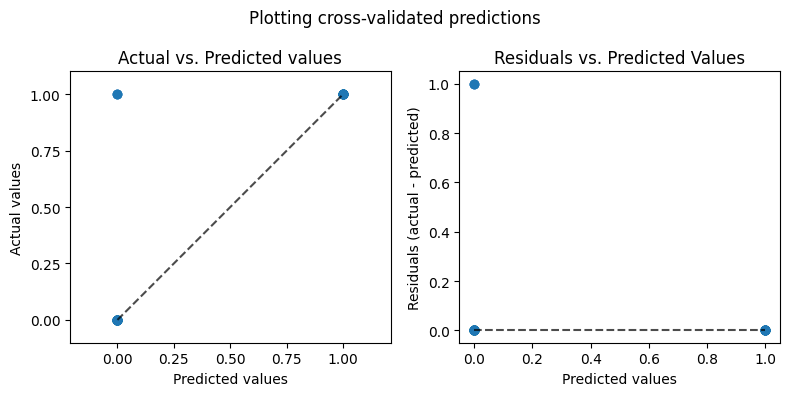

In [13]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

# ROC (Receiver Operating Characteristics) Analysis
ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point


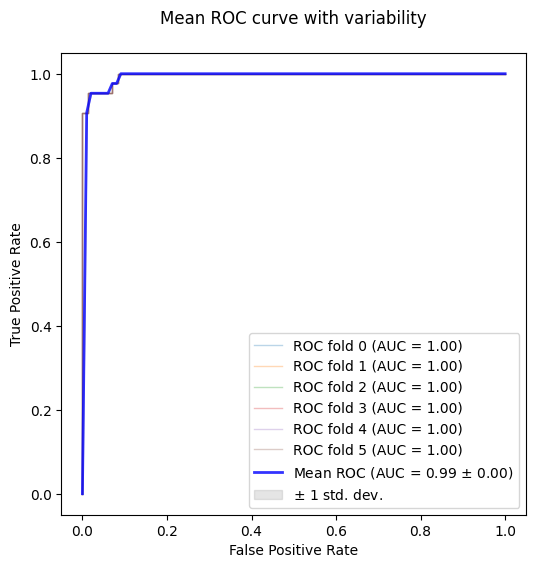

In [14]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
       
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n",
)
ax.legend(loc="lower right")
plt.show()


# Evalute performance of classifier using permutation_test_score 
1. It provides information on whether the classifier has found a real class structure and can help in evaluating the performance of the classifier.
2.  It provides a permutation-based p-value, which represents how likely an observed performance of the classifier would be obtained by chance.
3. For reliable results n_permutations should typically be larger than 100 and cv between 3-10 folds.


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 5)
X_train_features = chi2_features.fit_transform(X_train, y_train)
X_test_features = chi2_features.transform(X_test)
print('Number of Original Features:', X_train.shape[1])
print('Selected Number of Features:', X_train_features.shape[1])

Number of Original Features: 30
Selected Number of Features: 5


# # Model Selection using Recursive Feature elimination( APPLAYING CROSS VALIDATION):
In RFE, a machine learning model is trained on the full set of features, and the importance of each feature is then ranked based on its contribution to the model's accuracy. The feature with the lowest ranking is then removed from the dataset, and the process is repeated iteratively until a desired number of features is reached or the model's performance deteriorates.

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [18]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), cv=5,scoring='accuracy', step=1)
rfecv = rfecv.fit(X_train, y_train)

In [19]:
df = X[X.columns[rfecv.support_]]

In [20]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 23
Best features : Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se',
       'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [21]:
models = [KNeighborsClassifier(n_neighbors=15),GaussianNB(),DecisionTreeClassifier(),BaggingClassifier(),LogisticRegression(),RandomForestClassifier(),CatBoostClassifier(silent=True),LGBMClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),LinearDiscriminantAnalysis()]

d = {}
d["Model"] = ["KNN","Naive Bays","Decision Tree","Bagging","Logistic Regression","RandomForest", "CatBoost", "LightGBM","GradientBoosting", "AdaBoost", "SVM", "LDA"]
d["accuracy"] = []
d["precision"] = []
d["recall"] = []
d["f1_score"] = []
d["auc"] = []
for i,model in enumerate(d["Model"]):
    y_pred = cross_val_predict(models[i],df,y)
    d["accuracy"].append(accuracy_score(y_pred,y))
    d["precision"].append(precision_score(y_pred,y))
    d["recall"].append(recall_score(y_pred,y))
    d["f1_score"].append(f1_score(y_pred,y))
    d["auc"].append(roc_auc_score(y_pred,y))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [22]:
models_summary = pd.DataFrame(d)

In [23]:
models_summary.sort_values(["accuracy"], ascending = False)

,Model,accuracy,precision,recall,f1_score,auc
6,CatBoost,0.971880,0.943396,0.980392,0.961538,0.973758
7,LightGBM,0.963093,0.948113,0.952607,0.950355,0.960940
5,RandomForest,0.961336,0.938679,0.956731,0.947619,0.960360
8,GradientBoosting,0.961336,0.943396,0.952381,0.947867,0.959477
11,LDA,0.959578,0.900943,0.989637,0.943210,0.966893
9,AdaBoost,0.956063,0.938679,0.943128,0.940898,0.953408
3,Bagging,0.952548,0.924528,0.946860,0.935561,0.951331
4,Logistic Regression,0.949033,0.919811,0.942029,0.930788,0.947534
1,Naive Bays,0.936731,0.896226,0.931373,0.913462,0.935549
2,Decision Tree,0.920914,0.910377,0.881279,0.895592,0.913496


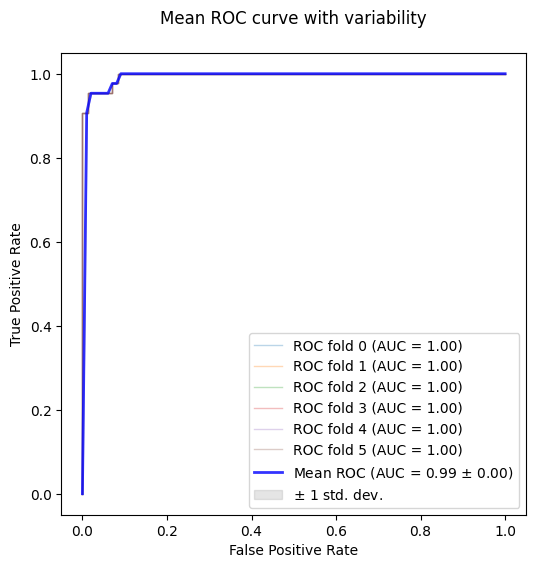

In [24]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
       
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n",
)
ax.legend(loc="lower right")
plt.show()
